In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
df=pd.read_csv(r"C:\Users\MR.INDIA\Desktop\Machine Learning\DataSets\clustering.csv")
df
df.head(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
Loan_ID              381 non-null object
Gender               376 non-null object
Married              381 non-null object
Dependents           373 non-null object
Education            381 non-null object
Self_Employed        360 non-null object
ApplicantIncome      381 non-null int64
CoapplicantIncome    381 non-null float64
LoanAmount           381 non-null float64
Loan_Amount_Term     370 non-null float64
Credit_History       351 non-null float64
Property_Area        381 non-null object
Loan_Status          381 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 26.9+ KB


In [4]:
df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [6]:
len(df[df.Gender =='Male'])

291

In [7]:
len(df[df.Gender =='Female'])

85

In [8]:
df.Dependents.unique()

array(['1', '0', '2', '3+', nan], dtype=object)

In [9]:
df.Property_Area.unique()

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

In [10]:
df.Loan_Status.unique()

array(['N', 'Y'], dtype=object)

In [11]:
df.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [12]:
df.Gender=df.Gender.fillna("Male")

In [13]:
len(df[df.Gender=="Male"])

296

In [15]:
df.Self_Employed.unique()

array(['No', 'Yes', nan], dtype=object)

In [16]:
len(df[df.Self_Employed=="No"])

325

In [17]:
len(df[df.Self_Employed=="Yes"])

35

In [18]:
df.Self_Employed=df.Self_Employed.fillna("No")

In [19]:
df.Dependents.unique()

array(['1', '0', '2', '3+', nan], dtype=object)

In [20]:
len(df[df.Dependents=="1"])

52

In [21]:
len(df[df.Dependents=="2"])

59

In [22]:
len(df[df.Dependents=="0"])

234

In [23]:
len(df[df.Dependents=="3+"])

28

In [24]:
df.Dependents=df.Dependents.fillna("0")

In [25]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [26]:
# df.Dependents.unique()
df.Loan_Amount_Term.median()

360.0

In [27]:
df.Credit_History.median()

1.0

In [28]:
df.Loan_Amount_Term = df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.median())
df.Credit_History = df.Credit_History.fillna(df.Credit_History.median())

# Replace value 

In [29]:
df2=df.replace({'Dependents':{'3+': '4'}})
df2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [30]:
df2.Dependents.unique()

array(['1', '0', '2', '4'], dtype=object)

# LabelEncoding 

In [31]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [32]:
df2.Gender = label.fit_transform(df.Gender)
df2.Married = label.fit_transform(df.Married)
df2.Education = label.fit_transform(df.Education)
df2.Self_Employed = label.fit_transform(df.Self_Employed)
df2.Property_Area = label.fit_transform(df.Property_Area)
df2.Loan_Status = label.fit_transform(df.Loan_Status)

In [33]:
df2.drop("Loan_ID",axis=1).head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1


In [34]:
# import seaborn as sn
# sn.pairplot(df2)

In [35]:
cl=df2[["Education","ApplicantIncome"]]

In [36]:
cl.head()

,Education,ApplicantIncome
0,0,4583
1,0,3000
2,1,2583
3,0,6000
4,1,2333


In [37]:
from sklearn.cluster import KMeans
km=KMeans()

# Sum of Sdrt Error 

In [38]:
sse=[]
for i in range(1,13):
    km=KMeans(n_clusters=i)
    km.fit(cl)
    sse.append(km.inertia_)

In [39]:
sse

[766031161.0183728,
 290858919.8368368,
 151003295.18033904,
 92915284.79920614,
 64993620.435196064,
 47049332.45251222,
 36160085.976095244,
 26304464.78672348,
 19139155.85579145,
 14770933.231786307,
 12512087.658732299,
 10345318.20535075]

Text(0, 0.5, 'SSE')

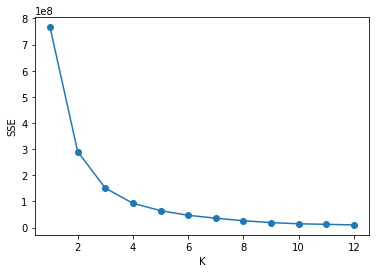

In [40]:
import seaborn as sn
plt.scatter(range(1,13),sse)
sn.lineplot(range(1,13),sse)
plt.xlabel("K")
plt.ylabel("SSE")

In [41]:
km=KMeans(4)
km.fit_predict(cl)

array([3, 2, 0, 1, 0, 2, 0, 0, 0, 3, 2, 2, 3, 0, 1, 0, 2, 2, 3, 0, 2, 2,
       3, 2, 0, 2, 2, 2, 0, 0, 2, 3, 2, 3, 3, 0, 2, 0, 2, 3, 3, 0, 0, 2,
       2, 0, 2, 3, 2, 1, 3, 0, 2, 3, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 3, 2,
       0, 0, 3, 0, 3, 2, 1, 0, 3, 2, 3, 0, 3, 0, 2, 2, 0, 0, 2, 3, 3, 2,
       3, 0, 0, 0, 3, 1, 0, 2, 2, 0, 2, 1, 3, 0, 0, 0, 2, 3, 2, 0, 2, 0,
       0, 3, 2, 0, 0, 3, 2, 3, 0, 2, 0, 2, 2, 3, 2, 2, 0, 2, 2, 3, 2, 2,
       0, 2, 3, 3, 0, 2, 2, 1, 3, 0, 2, 2, 2, 2, 2, 2, 3, 0, 1, 2, 1, 1,
       1, 2, 0, 2, 0, 1, 3, 3, 0, 1, 3, 3, 2, 2, 2, 2, 0, 2, 0, 2, 3, 2,
       0, 0, 2, 0, 2, 3, 2, 3, 2, 3, 3, 3, 0, 0, 2, 3, 0, 2, 2, 0, 2, 2,
       0, 3, 2, 2, 0, 2, 0, 3, 2, 3, 3, 0, 3, 2, 2, 3, 3, 0, 2, 0, 2, 0,
       3, 0, 2, 2, 2, 3, 3, 2, 1, 1, 0, 3, 2, 0, 3, 1, 3, 2, 3, 2, 1, 3,
       2, 0, 0, 3, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 3, 0, 0, 2, 0, 2,
       0, 2, 3, 0, 0, 1, 0, 3, 1, 2, 0, 1, 1, 0, 2, 0, 1, 3, 2, 3, 2, 2,
       0, 0, 2, 0, 1, 2, 3, 3, 1, 3, 3, 1, 2, 0, 3,

In [42]:
cl["cluster"]= km.fit_predict(cl)

c:\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
cl.head()

,Education,ApplicantIncome,cluster
0,0,4583,0
1,0,3000,3
2,1,2583,1
3,0,6000,2
4,1,2333,1


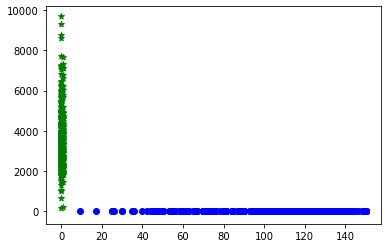

In [65]:
plt.scatter(df2["Education"],df2['ApplicantIncome'],color="green",marker="*")
plt.scatter(df2["LoanAmount"],df2['Property_Area'],color="blue",marker="o")

In [66]:
c1 = cl[cl.cluster == 0]
c2 = cl[cl.cluster == 1]
c3 = cl[cl.cluster == 2]
c4 = cl[cl.cluster == 3]  

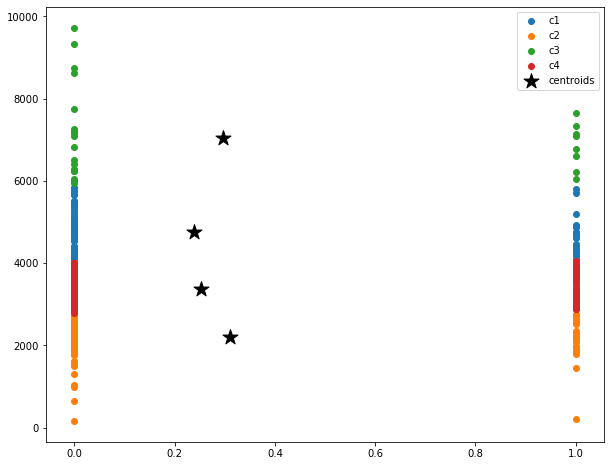

In [71]:
plt.figure(figsize=(10,8))
plt.scatter(c1["Education"],c1['ApplicantIncome'],label="c1")
plt.scatter(c2["Education"],c2['ApplicantIncome'],label="c2")
plt.scatter(c3["Education"],c3['ApplicantIncome'],label="c3")
plt.scatter(c4["Education"],c4['ApplicantIncome'],label="c4")
# plt.scatter(c5["int.rate"],c5["installment"],label="c5")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],
            label= "centroids",marker="*",
            color = "black",s=250)
plt.legend()

In [77]:
cl2=df2[["LoanAmount","Property_Area"]]

In [78]:
cl2

,LoanAmount,Property_Area
0,128.0,0
1,66.0,2
2,120.0,2
3,141.0,2
4,95.0,2
...,...,...
376,128.0,2
377,108.0,0
378,71.0,0
379,40.0,0


In [79]:
from sklearn.cluster import KMeans
km2=KMeans()

In [82]:
sse2= []
for i in range(1,13):
    km2=KMeans(n_clusters=i)
    km2.fit(cl2)
    sse2.append(km2.inertia_)

In [83]:
sse2

[305827.88451443566,
 98921.018805072,
 46055.94017254519,
 28387.745344089366,
 17714.92160855236,
 13587.02080792087,
 9417.758897397573,
 7465.161564559408,
 5730.670108252079,
 4786.522678637961,
 4019.2939846124173,
 3252.201689184829]

Text(0, 0.5, 'SSE')

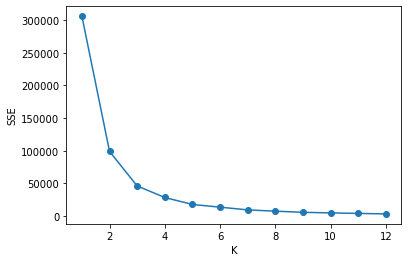

In [84]:
import seaborn as sn
plt.scatter(range(1,13),sse2)
sn.lineplot(range(1,13),sse2)
plt.xlabel("K")
plt.ylabel("SSE")

In [91]:
km2=KMeans(3)
km2.fit_predict(cl2)

array([2, 1, 2, 2, 0, 1, 0, 0, 1, 2, 0, 1, 2, 0, 0, 0, 0, 2, 0, 1, 2, 1,
       0, 0, 0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2,
       2, 2, 0, 0, 2, 2, 2, 0, 1, 0, 0, 0, 2, 0, 1, 2, 0, 0, 2, 1, 2, 1,
       2, 1, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 1, 2, 1, 0, 1, 1, 1, 0, 0, 0,
       2, 2, 0, 1, 2, 2, 0, 1, 2, 0, 2, 1, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 2, 2, 0, 0, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 0,
       2, 2, 1, 2, 1, 0, 2, 2, 2, 0, 1, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0,
       2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 0, 0, 1, 2, 0,
       1, 1, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0,
       1, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 1, 0, 0, 1, 1, 1, 1, 1, 2, 2, 0,
       0, 2, 0, 1, 0, 1, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 1, 2, 2, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 2, 2, 1, 0, 0, 2, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 2, 2, 0, 1, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 1, 0, 0,

In [92]:
cl2['cluster'] = km2.fit_predict(cl2)
cl2.head()

c:\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,LoanAmount,Property_Area,cluster
0,128.0,0,0
1,66.0,2,1
2,120.0,2,0
3,141.0,2,0
4,95.0,2,2


In [95]:
c1 = cl2[cl2.cluster == 0]
c2 = cl2[cl2.cluster == 1]
c3 = cl2[cl2.cluster == 2]

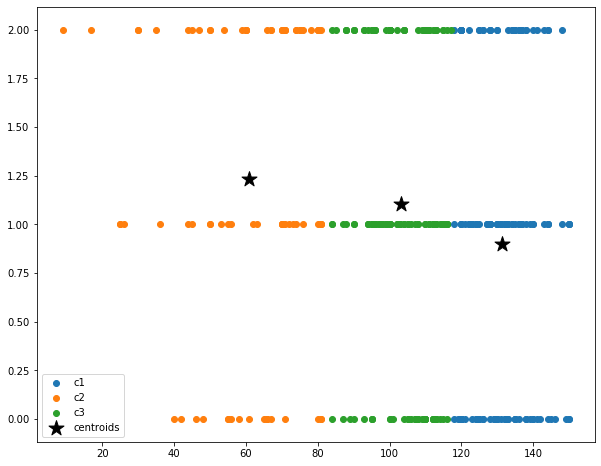

In [96]:
plt.figure(figsize=(10,8))
plt.scatter(c1["LoanAmount"],c1['Property_Area'],label="c1")
plt.scatter(c2["LoanAmount"],c2['Property_Area'],label="c2")
plt.scatter(c3["LoanAmount"],c3['Property_Area'],label="c3")
# plt.scatter(c4["LoanAmount"],c4['Property_Area'],label="c4")
# plt.scatter(c5["int.rate"],c5["installment"],label="c5")
plt.scatter(km2.cluster_centers_[:,0],km2.cluster_centers_[:,1],
            label= "centroids",marker="*",
            color = "black",s=250)
plt.legend()